# Sentiment Analysis Project

In [1]:
# import packages
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from wordcloud import WordCloud, STOPWORDS

from pattern.en import sentiment
from textblob import TextBlob

# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from lxml import html
import seaborn as sns

import re
import pandas as pd

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

pd.set_option('display.max_colwidth', None)

from bs4 import BeautifulSoup   # python package to handle HTML 

import json
import nltk
import itertools
from collections import Counter
from operator import itemgetter

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import sklearn
import numpy as np
from collections import Counter

# suppress error messages
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

# Business and Data Understanding 

#### Recent happenings in the life of a celebrity in Ghana who took a nude photo with her son during the son's birthday and posted the nude photo on all social media platforms. The celebrity got arrested for indecent exposure to a minor and child abuse when a complaint was made to the appropriate law agency by the Child Right Institute. Data was collected in real time from twitter feeds for about two hours. The data contains comments and story in the relation to the celebrity involved with name "Akuapem Poloo" which is her stage name upon research and was collected on the 17th of April 2021. Our first hypothesis  will highlight the fact that as there is a particular individual involved, we expect to see the word "Akuapem Poloo" as the most used word in our word frequency, descriptive analysis. Our second hypothesis is to find out where people support her arrest or are against the idea of her being sentenced to 3 months in prison through sentiment analysis. The third hypothesis is since she is a celebrity, our network analysis we expect to see people in conversations to be media personnel and celebrities in Ghana and to also find out who is the most important person.

# Data identification and collection 

### API-based data collection for Descriptive Analysis, Word Frequency, Word Cloud, Sentiment Analysis and Network Analysis

In [4]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/twitter_akuapem.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print(len(data))

859


In [5]:
# read the first five tweets and other meta data only
for i in data[:1]:
    print(i)

{'created_at': 'Sat Apr 17 21:34:16 +0000 2021', 'id': 1383534300960677893, 'id_str': '1383534300960677893', 'text': 'Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 731027855589658626, 'id_str': '731027855589658626', 'name': 'ACHIMOTA SARKODIE🇬🇭™️', 'screen_name': 'Naks_GH', 'location': 'Accra, Ghana', 'url': None, 'description': 'LoyaltyOVERoyalty💯|The Simplest Way To Become My Enemy is to Hate @sarkodie ❤️|Barcelona🇲🇳LF.C🇭🇰&Accra Hearts of Oak🇷🇴 Fanatic| Football Analysts|', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3650, 'friends_count': 2472, 'listed_count': 0, 'favourites_count': 21045, 'statu

# Data cleaning & Text preprocessing for API

In [6]:
# saving the entire tweets (not other data) in a variable and print it
texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

859

In [7]:
# removing any error messages from Twitter API
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets) 

859

In [8]:
# display five screen names (twitter user names)
for i in tweets[:5]:
    print(i['user']['screen_name'])

Naks_GH
Naks_GH
PrinceArabian4
Facty_Gh
Jay___nastyy


In [9]:
# cleaning unwanted characters
texts_cleaned = []

for i in texts:
    result = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i)
    texts_cleaned.append(result)

texts_cleaned[:5]

['Nana Addo Dankwa AkufoAddo Free Akuapem Poloo  Sign the Petition  via ',
 'RT  Nana Addo Dankwa AkufoAddo Free Akuapem Poloo  Sign the Petition  via ',
 'Nana Addo Dankwa AkufoAddo Free Akuapem Poloo  Sign the Petition  via ',
 'Socalled celebrities claiming to be showing solidarity to Akuapem Poloo but lowkey they diss her for her nudity o ',
 'RT  Nana Addo Dankwa AkufoAddo Free Akuapem Poloo  Sign the Petition  via ']

In [10]:
# More codes for extracting information from tweets

ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]
followers_count = [T['user']['followers_count'] for T in tweets]
friends_count = [T['user']['friends_count'] for T in tweets]
names = [T['user']['name'] for T in tweets]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]

# open an output csv file to write to
out = open('data/twitter_p.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type\n')

# merge each individual list into a single list using the zip function
rows = list(zip(ids, times, texts, screen_names, followers_count, friends_count, names, lats, lons, place_names, place_types))

# use the writer module on our csv file
csv = csv.writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    #values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()


In [11]:
# Displaying data
df = pd.read_csv("data/twitter_p.csv")
df.head(2)

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type
0,1383534300960677893,Sat Apr 17 21:34:16 +0000 2021,Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change,Naks_GH,3650,2472,ACHIMOTA SARKODIE🇬🇭™️,NaN,NaN,NaN,NaN
1,1383534324943790084,Sat Apr 17 21:34:22 +0000 2021,RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change,Naks_GH,3650,2472,ACHIMOTA SARKODIE🇬🇭™️,NaN,NaN,NaN,NaN


# Descriptive analytics for API

In [21]:
# how many tweets
len(texts)

859

In [22]:
# how many tweets with hashtag?
# extract and display all hashtags from first 10 tweets
for tweet in texts:
    len(re.findall(r"(?<=#)\w+", tweet))

In [23]:
counthashtag = 0

for tweet in texts:
    if len(re.findall(r"(?<=#)\w+", tweet)) > 0:
        counthashtag += 1
        
print(counthashtag)

130


In [24]:
# remove retweets so we can extract all original tweets and save them
originaltweets = []
for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

285

In [25]:
# get retweets only
#remove original tweets
retweets_only = []
for tweet in texts:
      if 'rt @' in tweet.lower():
            retweets_only.append(tweet)
        
len(retweets_only)

574

### Tweet: Time series

In [26]:
# saving 'created_at' from the twitter data
times = [T['created_at'] for T in tweets]
len(times)

859

In [27]:
# set index on time
time_df = pd.DataFrame(times)
time_df.columns = ['time']
time_df['time'] = pd.to_datetime(time_df['time'])   # data type to datetime
time_df = time_df.set_index('time')    # time as index
time_df.head()

""
time
2021-04-17 21:34:16+00:00
2021-04-17 21:34:22+00:00
2021-04-17 21:34:46+00:00
2021-04-17 21:34:51+00:00
2021-04-17 21:34:56+00:00


In [28]:
import pytz
central = pytz.timezone('US/Central')
time_df.index = time_df.index.tz_convert(central)
time_df.head()

""
time
2021-04-17 16:34:16-05:00
2021-04-17 16:34:22-05:00
2021-04-17 16:34:46-05:00
2021-04-17 16:34:51-05:00
2021-04-17 16:34:56-05:00


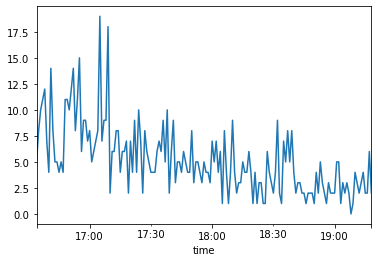

In [29]:
# visualize minute-level trend
time_df.resample('1Min').size().plot();

### User metrics

In [30]:
# how many unique users in the data?
u = Counter(screen_names)
len(u)

724

### Most active users

In [31]:
c = Counter(screen_names)
# five most active tweeters
u.most_common(5)

[('57FuccinLegend', 6),
 ('bbtelorm', 6),
 ('TotorimiBlog', 5),
 ('Bobby_SarkCess', 4),
 ('AfariAndrews', 3)]

In [32]:
# make it pretty
activetweeters_df = pd.DataFrame(c.most_common(5))
activetweeters_df

,0,1
0,57FuccinLegend,6
1,bbtelorm,6
2,TotorimiBlog,5
3,Bobby_SarkCess,4
4,AfariAndrews,3


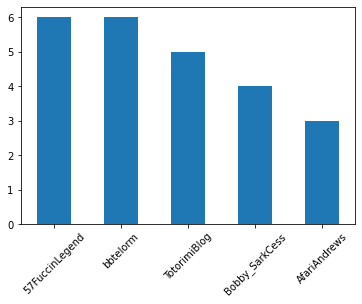

In [33]:
# visualize the above results
ax = activetweeters_df.plot(kind='bar', legend=False)
ax.set_xticklabels(activetweeters_df[0], rotation=45);

### Who is sharing location information?

In [34]:
#how many tweets contain geocode
geo = [T['user']['geo_enabled'] for T in tweets if 'user' in T]
c = Counter(geo)
print(c)

Counter({False: 448, True: 411})


In [35]:
# the out put is in dictionary
print(c.keys(), c.values())

dict_keys([False, True]) dict_values([448, 411])


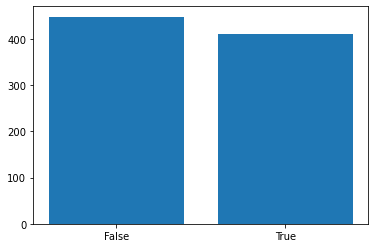

In [36]:
# visualize the above results
plt.bar(range(len(c)), c.values())
plt.xticks(range(len(c)), c.keys());

### Most visible users

In [37]:
# first extract all users from tweets
#let's use regular expression ...     
for tweet in texts[:5]:
    print(re.findall(r"(?<=@)\w+", tweet))

['Change']
['gyaigyimii', 'Change']
['Change']
[]
['1RealJoeyB', 'Change']


In [38]:
# there could be multiple mentions in a single tweet
for tweet in texts[:5]:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        print('@'+i)

@Change
@gyaigyimii
@Change
@Change
@1RealJoeyB
@Change


In [39]:
visible_users = []
for tweet in texts:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        visible_users.append(['@'+i][0])

In [40]:
# 10 most visible users in this dataset
c = Counter(visible_users)
c.most_common(10)

[('@Change', 488),
 ('@1RealJoeyB', 249),
 ('@RevErskineGH', 74),
 ('@iamcardib', 38),
 ('@RicchCliff_', 28),
 ('@Joy997FM', 26),
 ('@gyaigyimii', 25),
 ('@visaboyy', 9),
 ('@bbygirldarks', 6),
 ('@BenopaOnyx1', 6)]

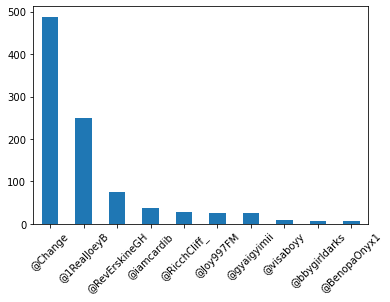

In [41]:
# visualize 10 most visible users
visible_df = pd.DataFrame(c.most_common(10))
ax = visible_df.plot(kind='bar', legend=False)
ax.set_xticklabels(visible_df[0], rotation=45);

### Where do people live?

In [42]:
location = [i['user']['location'] for i in tweets ]
len(location)

859

In [43]:
for i in location[:10]:   # first 10 twitter users
    print(i)

Accra, Ghana
Accra, Ghana
Takoradi 
Accra, Ghana 🇬🇭 
Accra, Ghana 🇬🇭
West Legon 
Earth 🌍 
Proxima Centauri
🇺🇸|🇬🇭
None


### Word Frequency

In [44]:
# With our word frequency, stopwords were excluded since most of the words in the dataset are none English words.
from html import unescape

def freq_analysis(texts):
    tokens = str(texts)
    #lowecases
    tokens = tokens.lower()
    # remove HTML related characters (&amp’,’&quot’,etc.)
    soup = BeautifulSoup(unescape(tokens), 'lxml')
    # remove urls
    tokens = re.sub(r'http\S+', '', soup.text)
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #remove stopwords manually since there are foreign languagues needed for the analysis
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    #compute frequency distribution for all the bigrams in the text
    fdist = nltk.FreqDist(tokens)
    
    #k refers to keys (or tokens); v refers to values (or counts)
    return  fdist

In [45]:
# identifying first 10 words
fdist = freq_analysis(originaltweets)
for k,v in list(fdist.items())[:10]:
    print(k,v)

nana 157
addo 320
dankwa 159
akufo 161
free 168
akuapem 223
poloo 226
sign 165
the 185
petition 164


In [46]:
# top 10 words
fdist.most_common(10)

[('addo', 320),
 ('poloo', 226),
 ('akuapem', 223),
 ('the', 185),
 ('free', 168),
 ('sign', 165),
 ('petition', 164),
 ('via', 164),
 ('akufo', 161),
 ('dankwa', 159)]

In [47]:
# With our word frequency, stopwords were excluded since most of the words in the dataset are none English words.
from html import unescape

def freq_analysis(texts):
    tokens = str(texts)
    #lowecases
    tokens = tokens.lower()
    # remove HTML related characters (&amp’,’&quot’,etc.)
    soup = BeautifulSoup(unescape(tokens), 'lxml')
    # remove urls
    tokens = re.sub(r'http\S+', '', soup.text)
    # Remove useless numbers and alphanumerical words
    tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    # Filter non-alphanumeric characters from tokens
    tokens = (word for word in tokens if word.isalpha())
    #remove stopwords manually since there are foreign languagues needed for the analysis
    #remove short words
    tokens = (word for word in tokens if len(word) >= 3)
    bigrams = nltk.bigrams(tokens)
    #compute frequency distribution for all the bigrams in the text
    fdist_bi = nltk.FreqDist(bigrams)
    #k refers to keys (or tokens); v refers to values (or counts)
    return fdist_bi

In [48]:
# identifying first 10 words
fdist_bi = freq_analysis(originaltweets)
for k,v in list(fdist_bi.items())[:10]:
    print(k,v)

('nana', 'addo') 157
('addo', 'dankwa') 159
('dankwa', 'akufo') 159
('akufo', 'addo') 161
('addo', 'free') 158
('free', 'akuapem') 164
('akuapem', 'poloo') 222
('poloo', 'sign') 157
('sign', 'the') 158
('the', 'petition') 157


In [49]:
# top 10 words
fdist_bi.most_common(10)

[(('akuapem', 'poloo'), 222),
 (('free', 'akuapem'), 164),
 (('akufo', 'addo'), 161),
 (('addo', 'dankwa'), 159),
 (('dankwa', 'akufo'), 159),
 (('addo', 'free'), 158),
 (('sign', 'the'), 158),
 (('via', 'change'), 158),
 (('nana', 'addo'), 157),
 (('poloo', 'sign'), 157)]

#### From our word frequency analysis, the most common word is akuapem poloo who is the celebrity in trouble. Free akuapem is the next most common words together. Akuffo Addo comes next who happens to be the President of Ghana. 

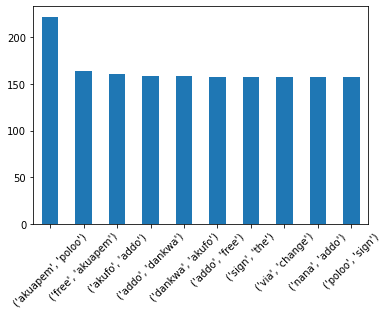

In [50]:
# visualize 10 most visible user
ha = fdist_bi.most_common(10)
ha_df = pd.DataFrame(ha)

ax = ha_df.plot(kind='bar', legend=False)
ax.set_xticklabels(ha_df[0], rotation=45);

### Wordcloud Analysis

In [51]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from wordcloud import WordCloud, STOPWORDS
mask = np.array(Image.open("data/butterfly.png"))

stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("the")
stopwords.add("you")
stopwords.add("yours")
stopwords.add("can")
stopwords.add("and")
stopwords.add("that")
stopwords.add("will")
stopwords.add("one")
stopwords.add("able")
stopwords.add("etc")
stopwords.add("has")
stopwords.add("done")
stopwords.add("see")
stopwords.add("new")
stopwords.add("first")

wordcloud = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(' '.join(texts_cleaned))


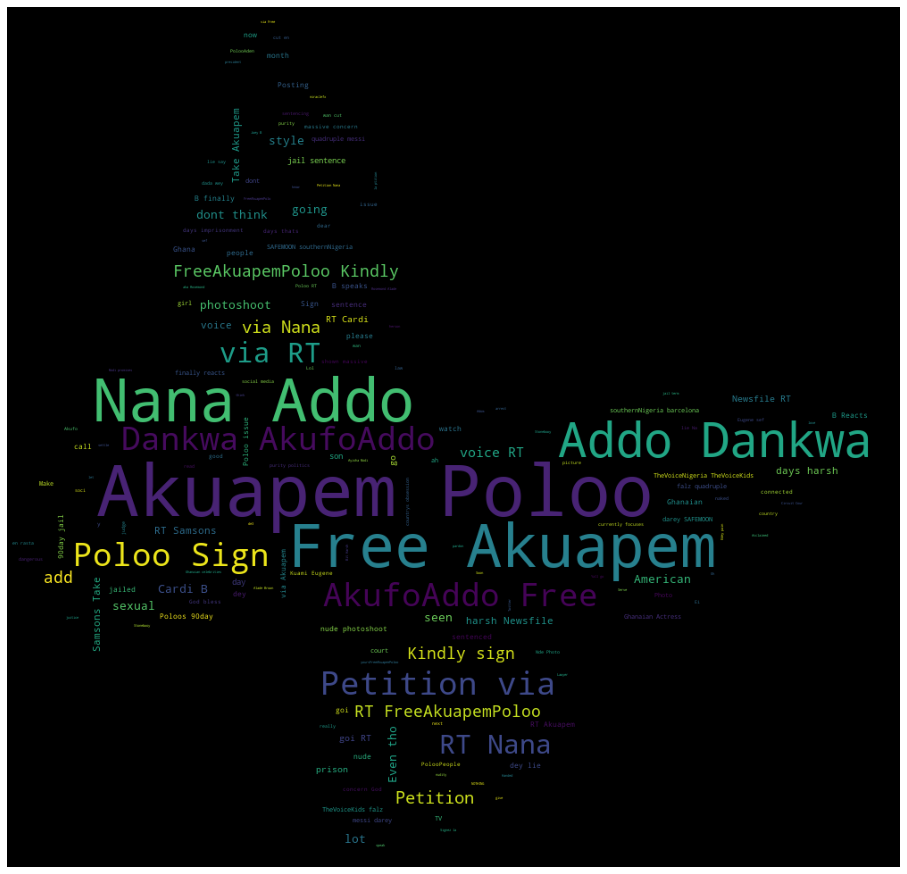

(-0.5, 999.5, 962.5, -0.5)

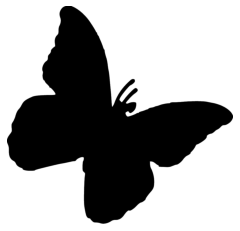

In [52]:
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis("off")

#### From the wordcloud analysis above we can clearly see the most popular words. we can see "free, kindly sign. petition, Akuapem Poloo, FreeAkuapemPoloo, Addo Dankwa" and others.

# Sentiment Analysis

In [82]:
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

texts[:5]

['Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change',
 'RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change',
 'Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/WryP0lcfb2 via @Change',
 'So-called celebrities claiming to be showing solidarity to Akuapem Poloo but low-key they diss her for her nudity o… https://t.co/taLp3kkoN7',
 'RT @1RealJoeyB: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/HMu1Y1Tpl3 via @Change']

In [83]:
# What is the overal sentiment? How many positive? how many negative? 

analyzer = SentimentIntensityAnalyzer()

for i in texts[:5]:
    vs = analyzer.polarity_scores(i)
    
    print(vs["compound"], vs["neg"], vs["neu"], vs["pos"]) 

0.5562 0.0 0.77 0.23
0.5562 0.0 0.796 0.204
0.5562 0.0 0.77 0.23
0.1531 0.0 0.922 0.078
0.5562 0.0 0.796 0.204


In [84]:
#saving results with original data

finaldata = []

for i in texts: 
    vs = analyzer.polarity_scores(i)
    finaldata.append([i, vs["compound"]])

len(finaldata)

859

In [85]:
df_2 = pd.DataFrame(finaldata)
df_2.columns = ['tweets', 'compound']
df_2.head(2)

,tweets,compound
0,Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change,0.5562
1,RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change,0.5562


In [86]:
positive_reviews = df.loc[df_2['compound'] > 0] # if compoundscore is > 0 then positive
negative_reviews = df.loc[df_2['compound'] < 0] # if compoundscore is < 0 then negative
neutral_reviews = df.loc[df_2['compound'] == 0] # if compoundscore is == 0 then neutral

print(len(positive_reviews))
print(len(negative_reviews))
print(len(neutral_reviews))

687
96
76


#### From our sentiment analysis, we can deduce 687 positive reviews, 96 negative reviews and 76 neutral reviews.

In [87]:
# Show five most negative tweets

df_2.sort_values('compound', ascending=False).tail()

,tweets,compound
523,"@_giselaamponsah @roseography Korcha papa b3n?! \nA whole Yaa Asantewaa fought wars while bare chested, Dipo girls… https://t.co/b31OYfiWlg",-0.7345
820,WHAT?! They're sending her to prison for this pic?! What crime was committed pls..And then the comments are just Af… https://t.co/X4BxaygDkS,-0.7680
815,Why court jailed Akuapem Poloo 3 months for publishing obscene photos - https://t.co/jO2z1N5Lt5 https://t.co/DXUnfNbcyE,-0.7906
835,"RT @EFYA_Nokturnal: This whole issue with akuapem poloo is beyond me .. we have abused girls , no beds at maternity wards !!! Accidents h…",-0.8260
201,"RT @TargetBlack7: This’s very painful but I know Akuapem Poloo go twerk for the prisoners and the prison officers, so they won’t worry her…",-0.9455


#### Looking at our negative tweets, we can deduce that most of the tweets aims at the decision taken by the court to jail the character in question. This means that, most people shared their views negatively on the decision the court has taken in relation to the celebrity.

In [88]:
# Show five most positive tweets

df_2.sort_values('compound', ascending=False).head()

,tweets,compound
89,Akuapem poloo in prison and Nam1 still enjoying his freedom 😂😂😂😂. I love my country GHANA 🇬🇭,0.8591
291,Tamper justice with mercy\nNana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/UpyZSXtSUO via @Change,0.8588
758,His Excellency Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/mD1FXQ5ZHR via @Change,0.7959
357,Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/AH0yFwRjHv via @Change free my gee,0.7840
793,RT @dkbghana: First call after 2 days that's not connected to my dear Akuapem Poloo.\n\nPeople have shown massive concern. God bless all of y…,0.7579


#### For our positive tweets, the sentiments here shows the solidarity and sympathy people showed towards the celebrity.

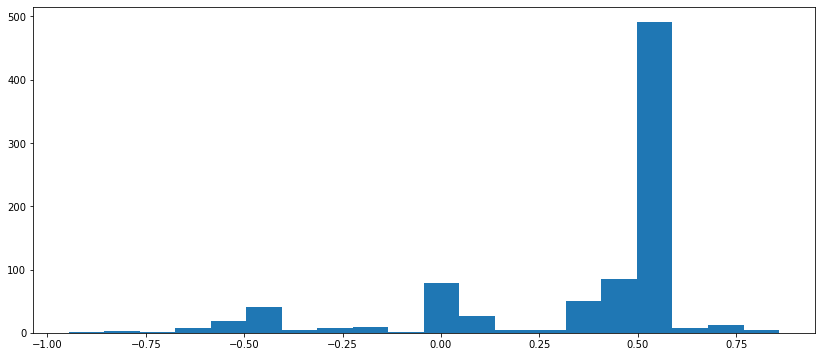

In [89]:
# visualization
plt.figure(figsize=(14,6))
plt.hist(df_2['compound'], bins=20);

# Network analytics

### Mentions Network

In [90]:
# python package for network analytics
import networkx as nx
from networkx.algorithms import community

import warnings
warnings.filterwarnings("ignore")

In [91]:
df.head(2)

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type
0,1383534300960677893,Sat Apr 17 21:34:16 +0000 2021,Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change,Naks_GH,3650,2472,ACHIMOTA SARKODIE🇬🇭™️,NaN,NaN,NaN,NaN
1,1383534324943790084,Sat Apr 17 21:34:22 +0000 2021,RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change,Naks_GH,3650,2472,ACHIMOTA SARKODIE🇬🇭™️,NaN,NaN,NaN,NaN


In [92]:
# let's process the data in list (better for text processing)

tweets = df.values
len(tweets)

859

In [93]:
for tweet in tweets[:2]:
    print(tweet[3], tweet[2])

Naks_GH Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change
Naks_GH RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change


In [94]:
mention = []

for tweet in tweets:
    mention.append([tweet[3], tweet[2]])
    
mention[:2]

[['Naks_GH',
  'Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change'],
 ['Naks_GH',
  'RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change']]

In [95]:
for tweet in mention[:2]:
    print(tweet[0], re.findall(r"(?<=@)\w+", tweet[1]))

Naks_GH ['Change']
Naks_GH ['gyaigyimii', 'Change']


In [96]:
for tweet in mention[:5]:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        print(tweet[0], i)

Naks_GH Change
Naks_GH gyaigyimii
Naks_GH Change
PrinceArabian4 Change
Jay___nastyy 1RealJoeyB
Jay___nastyy Change


In [97]:
#putting everything together

import csv

mention = []
for tweet in tweets:
    mention.append([tweet[3], tweet[2]])
    
openfile = open("data/mentionnetwork1.csv", "w", newline='')
w = csv.writer(openfile)

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        w.writerow([tweet[0], i])
        
openfile.close()

#### Degree
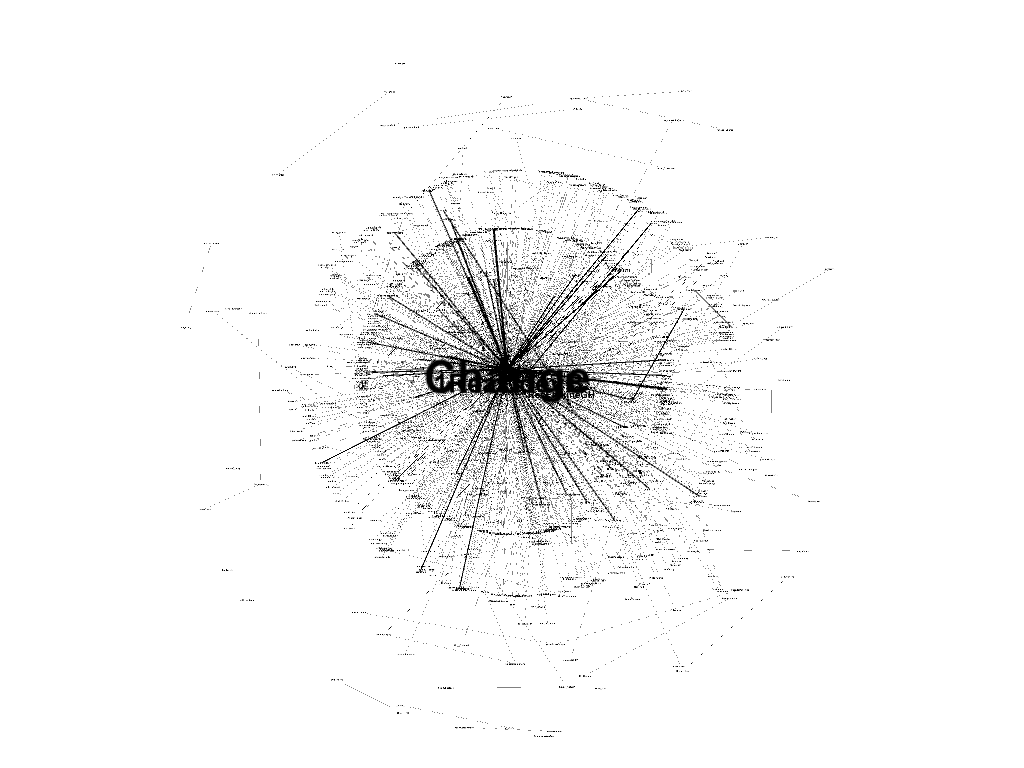

#### Degree as a metrics measures the number of edges between nodes in the network. It identifies which person has the highest number of nodes. Change has the highest number of degree making him the most important person using this metrics. The visualization below shows clearly, Change as a handle is the most important person.


#### Betweenness Centrality
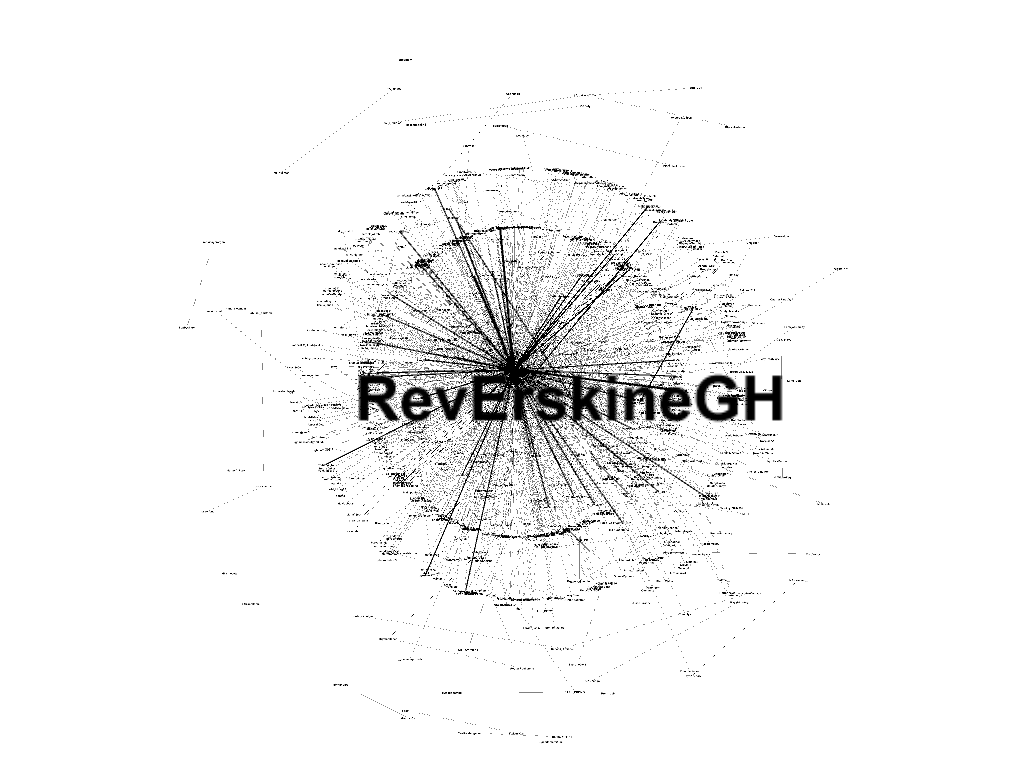

#### Using the betweenness centrality metrics, the most important individual is RevErskinGH with 99.0 and Dope_MC1 follows with 3.0. Betweenness centrality measures how a given node lies in shortness of paths between two other nodes which means high communication between the people in the nodes Below is a network visualization depicting the betweenness centrality. The visualization clearly shows RevErskinGH as the most important.

#### Closeness Centrality
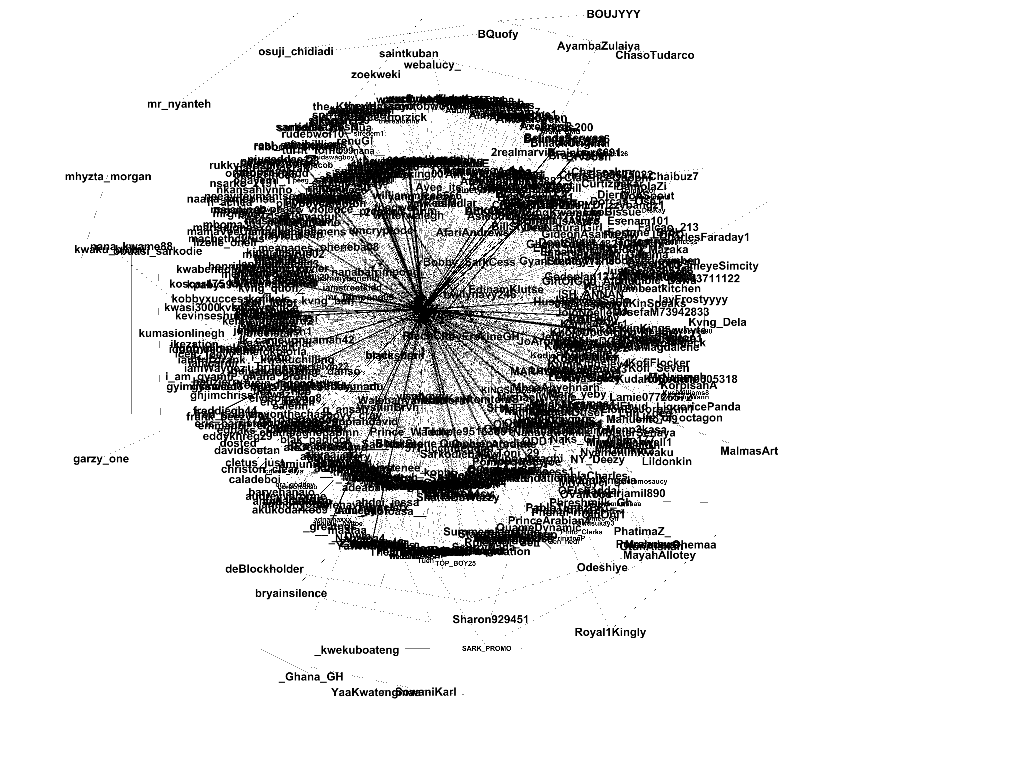


#### Another metrics that is used to determine the most important person in the movie is the closeness centrality. Here, we measure the average fairness in terms of distance of a node to all other nodes. Nodes with the shortest distance is considered the one with the highest score. The general idea is how quickly information is spread efficiently through the network. With this metrics, _kophi stands tall with 1. Above is a network visualization to show that. We can see above that lots of handles having the same score of closeness centrality which means that information spread easily in this network which is 1.

#### Eigenvector Centrality
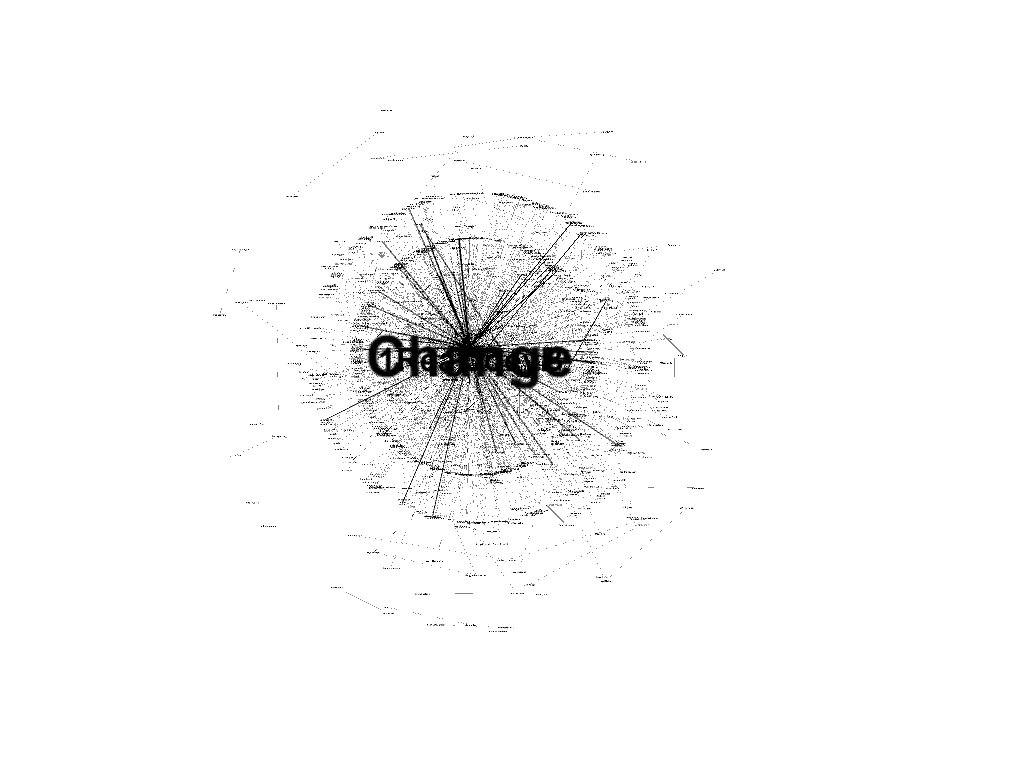

####  Eigenvector Centrality metrics takes into consideration the connection to the most popular node. Using Eigenvector Centrality metrics to determine who the most important, Change as a handle came out on top with 1.0 and 1RealJoeyB followed with 0.56211.The visualization above shows Change as the most important person in term of Eigenvector Centrality

#### Modularity Class
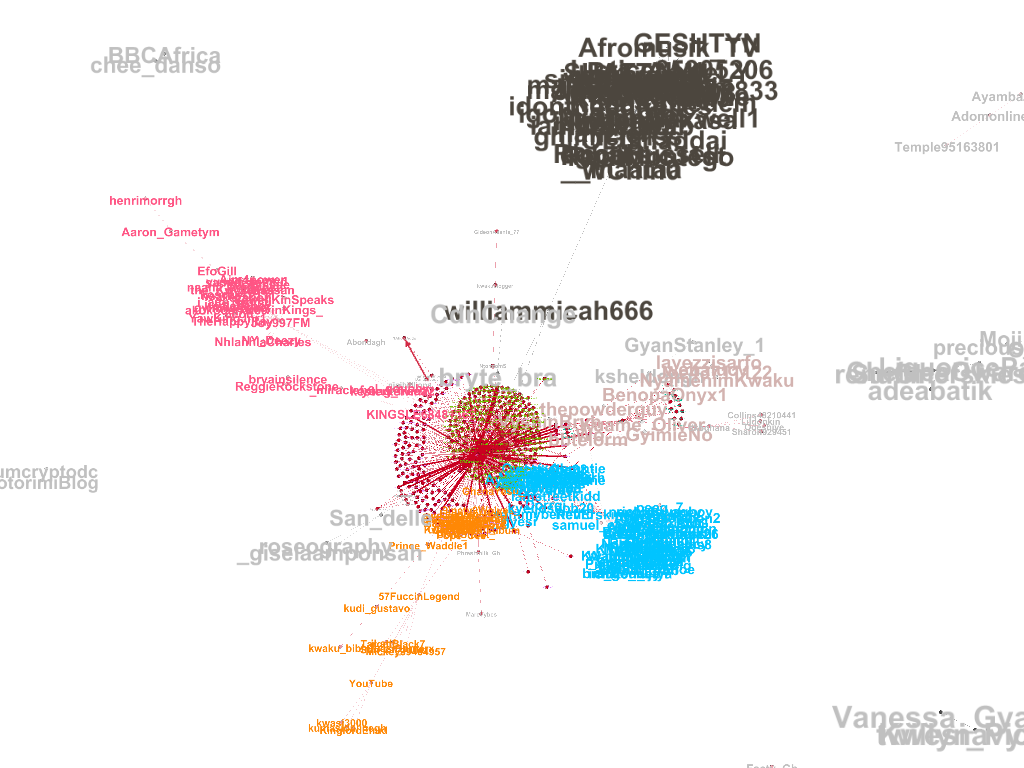


#### 	There are sixty-two (62) clusters. Thus cluster 0, 1, 2, 3, 4, 5 to 61. The two larger group or class is cluster 0 in purple colour and cluster 2 in green.  A subgroup or a cluster represents the tight connections between the nodes. Networks are hierarchical which means that some subgroups have more tight connections than others. By order of hierarchy, we have 0 and 2 being the 2 larger ones. The first and largest which is 0 has 28.07% and the second cluster has 25%.

### Cluster 0
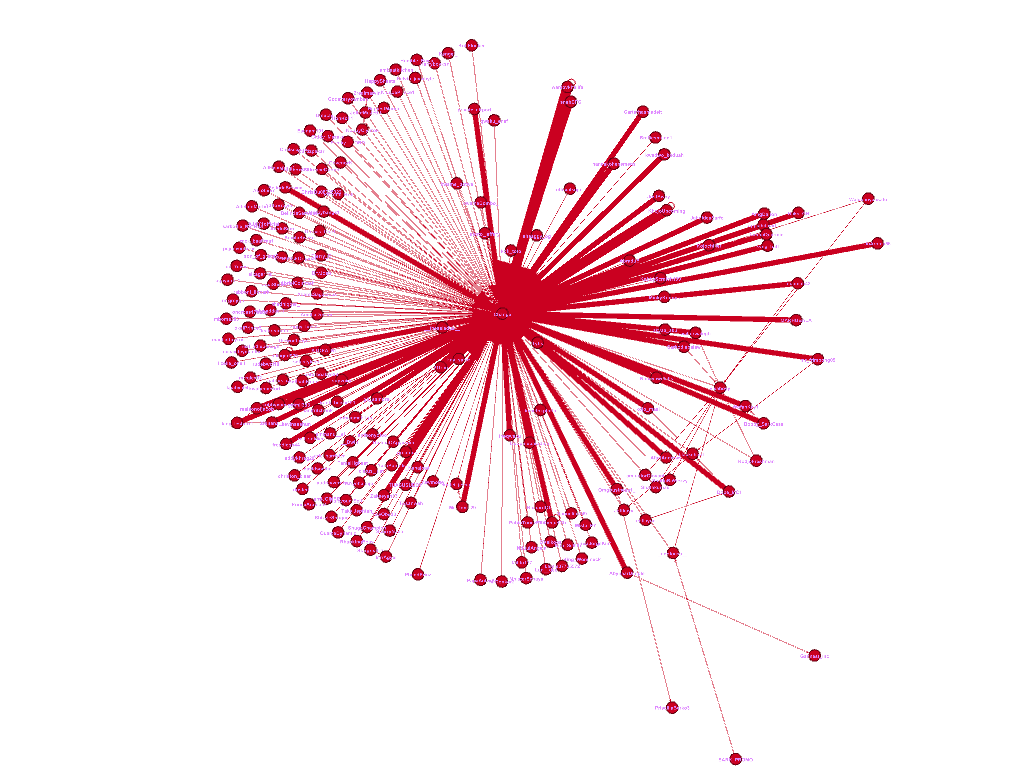

### Cluster 2

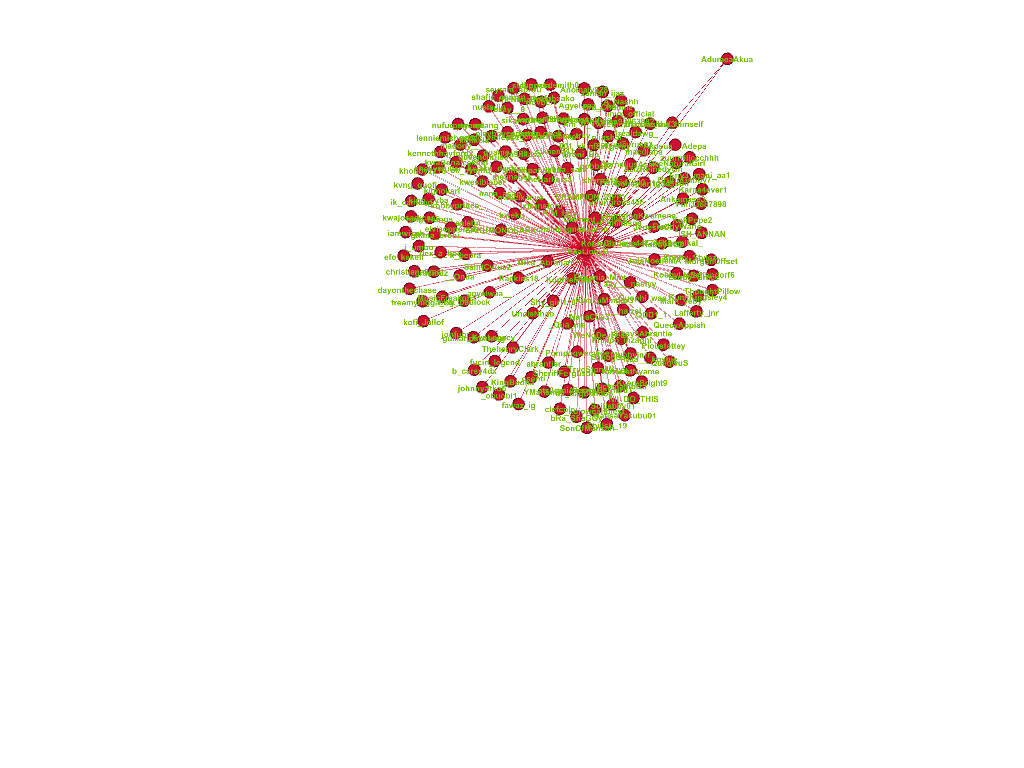

### Cluster Coefficient
#### The people with the high clustering coefficient scores are people who are directly connected to their respective nodes. In the network, these people tend to have a high degree of cluster formation. Examples of such persons are with handles ReggieRockston, realsonofjacob, ahdei_jessa and 37 other persons who have 1.0 cluster coefficients. All these individuals  also have betweenness centrality of 0.0.


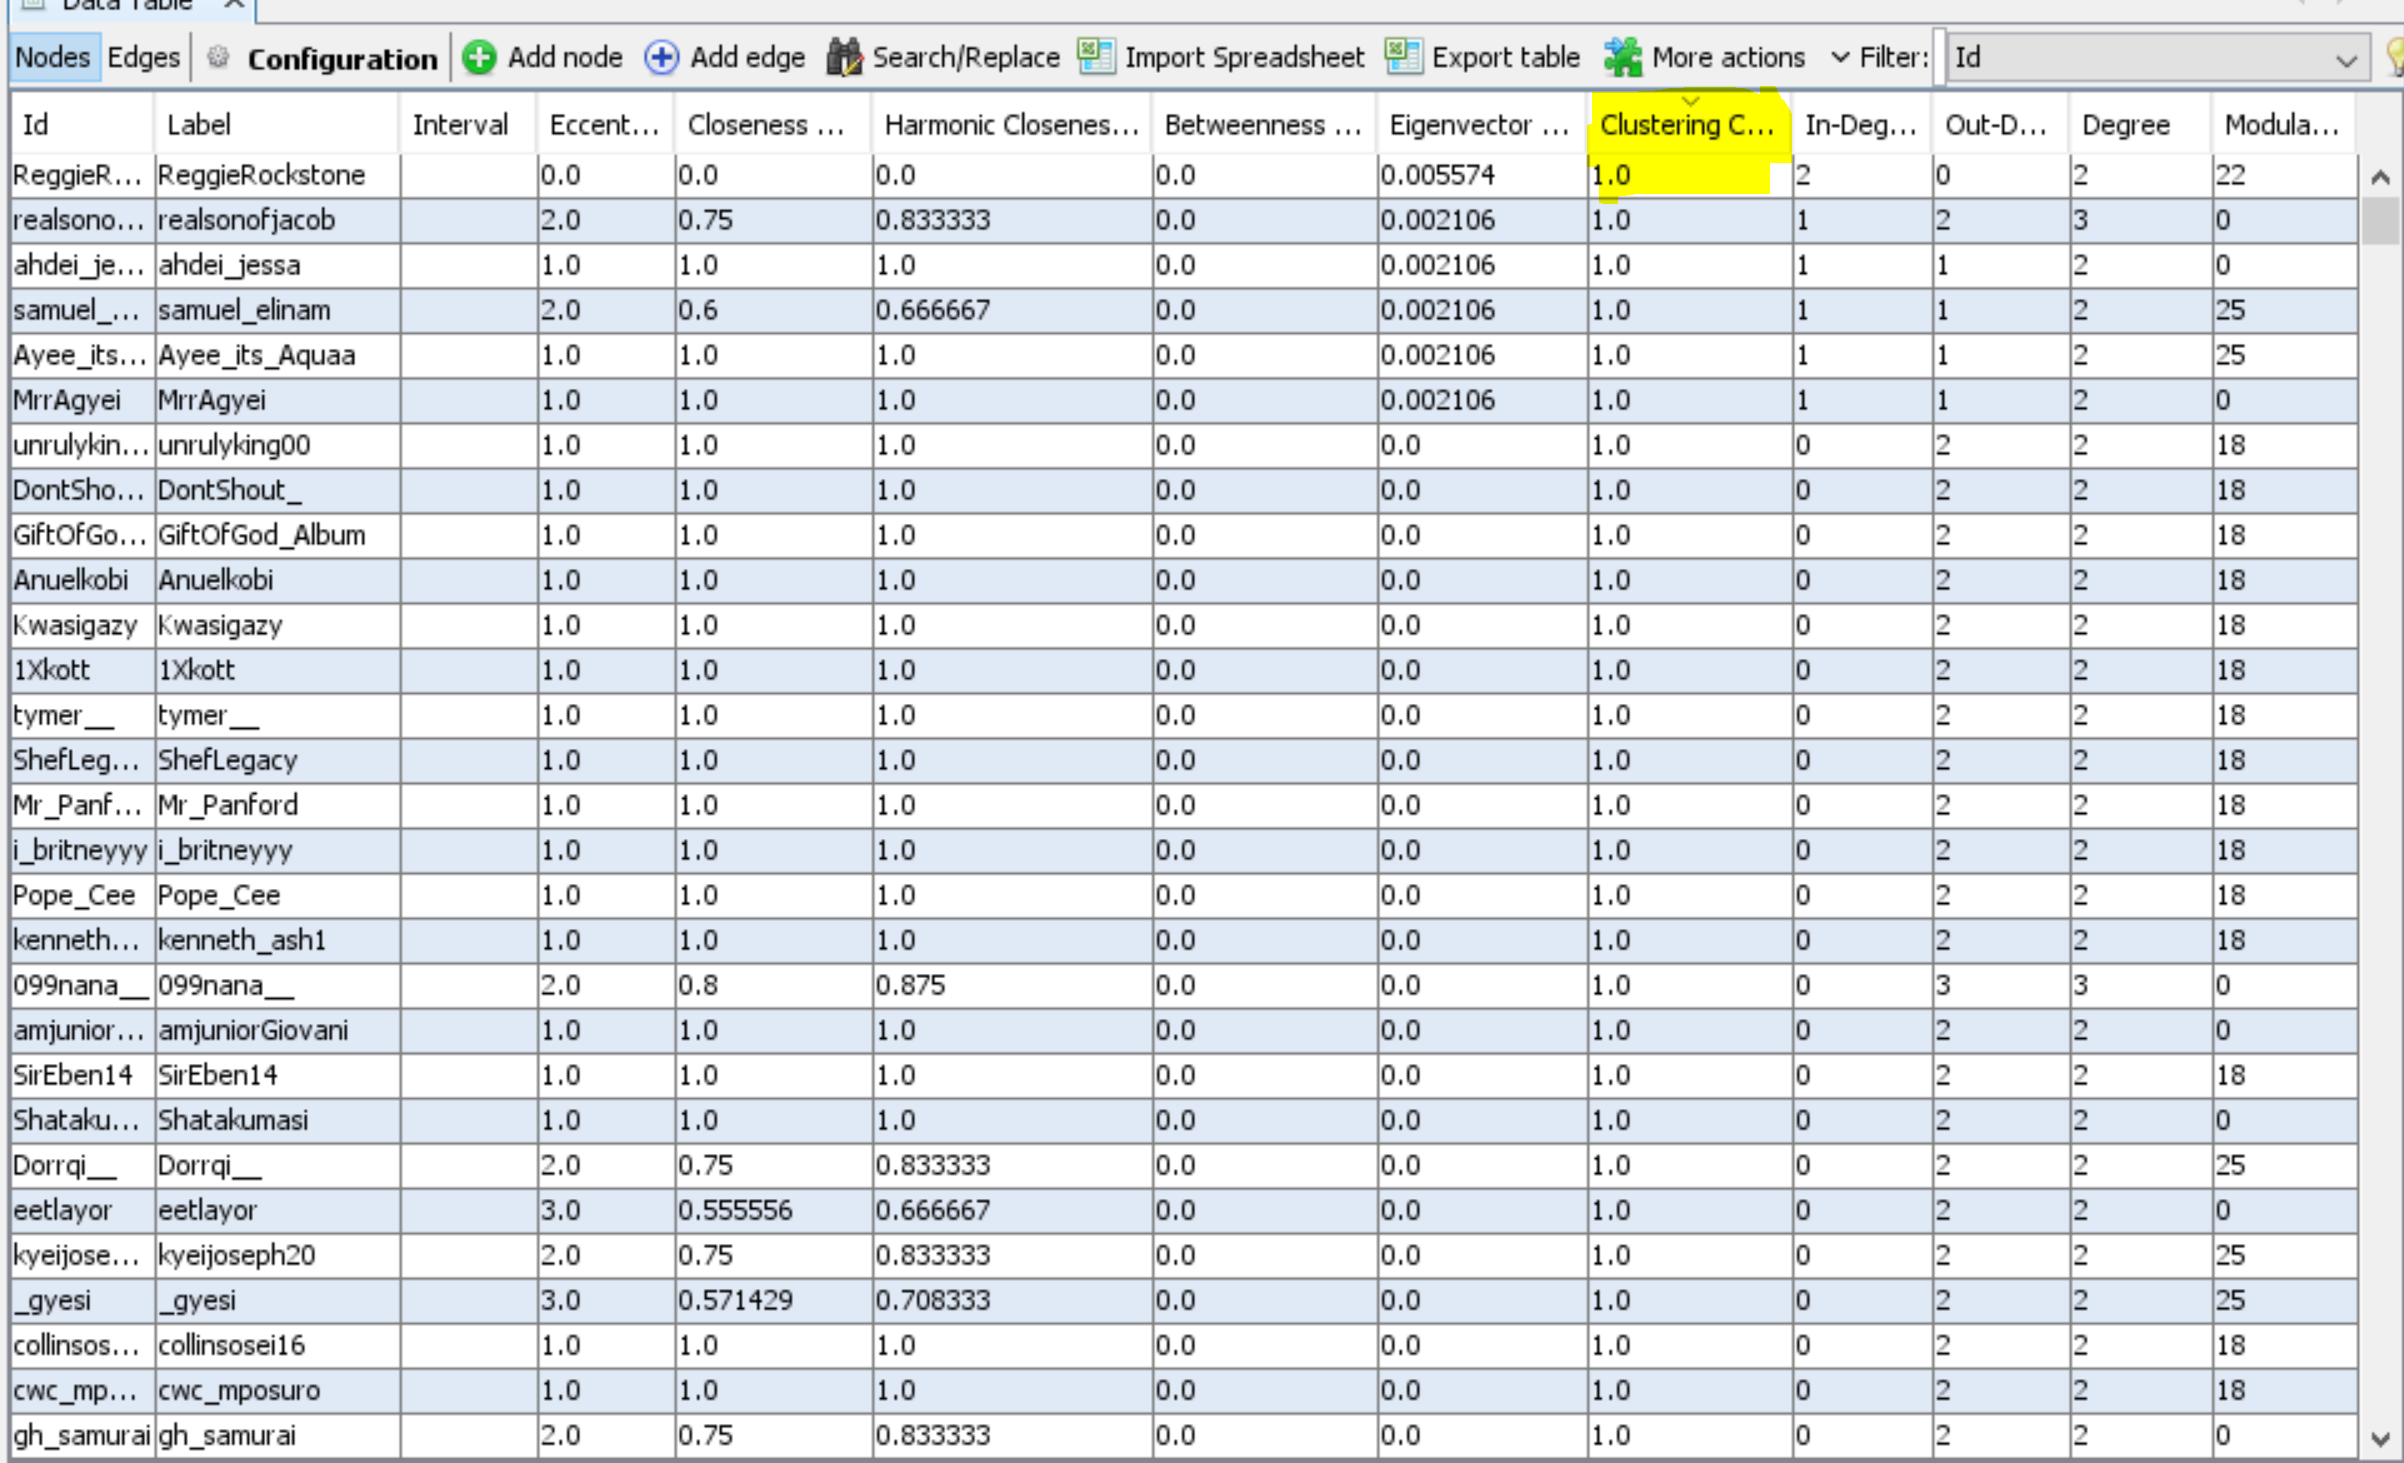

### Graph Density
#### The next Network-level metrics characteristics to talk about is the Graph Density. Graph Density shows how dense the connection of nodes are in the network. The concept is measured on a scale from 0 to 1. The closer it is to 1 the higher means very dense graph and the closer it is to 0 means very sparse graph. The graph density for our network is 0.002 which means the graph is very sparse graph.



### Co-Hashtag Network = Network-based Topic Modeling

In [98]:
for tweet in tweets[:5]:
    print(tweet[2])

Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/bLq2QEY7uc via @Change
RT @gyaigyimii: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/ZD9Lr5gXwZ via @Change
Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/WryP0lcfb2 via @Change
So-called celebrities claiming to be showing solidarity to Akuapem Poloo but low-key they diss her for her nudity o… https://t.co/taLp3kkoN7
RT @1RealJoeyB: Nana Addo Dankwa Akufo-Addo: Free Akuapem Poloo - Sign the Petition! https://t.co/HMu1Y1Tpl3 via @Change


In [99]:
for tweet in tweets[:5]:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[2])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    print(hashtag)

[]
[]
[]
[]
[]


In [100]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[2])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [101]:
hashtag_network[:10]

[[], [], [], [], [], [], [], [], [], []]

In [102]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:10]

[('adonkomusicmix', 'lovejunct'),
 ('thevoicenigeria', 'thevoicekids'),
 ('thevoicenigeria', 'safemoon'),
 ('thevoicekids', 'safemoon'),
 ('thevoicenigeria', 'thevoicekids'),
 ('thevoicenigeria', 'safemoon'),
 ('thevoicekids', 'safemoon'),
 ('thevoicenigeria', 'thevoicekids'),
 ('thevoicenigeria', 'safemoon'),
 ('thevoicekids', 'safemoon')]

In [103]:
#for cohashtag analysis
outfile = open("data/cohashtag_network.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

#### Degree Centrality
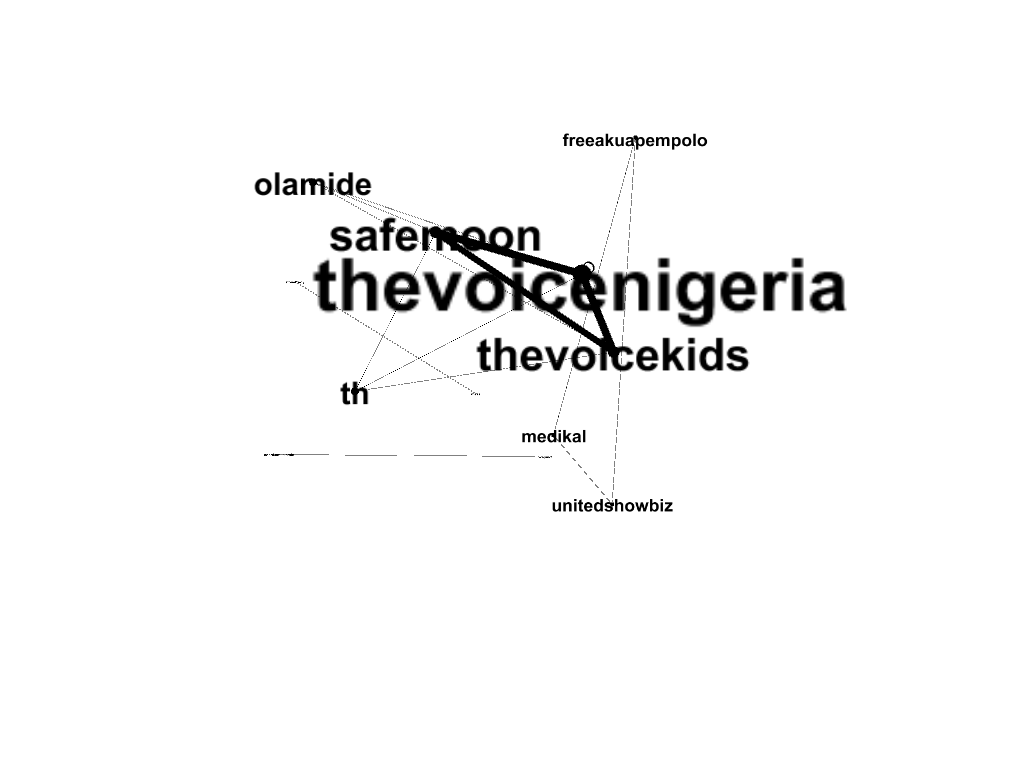

#### Degree as a metrics measures the number of edges between nodes in the network. It identifies which hash tag has the highest number of nodes. thevoicenigeria has the highest number of degree making him the most important hash tag using this metrics. The visualization below shows clearly, thevoicenigeria as a handle is the most important hash tag.


#### Betweenness Centrality
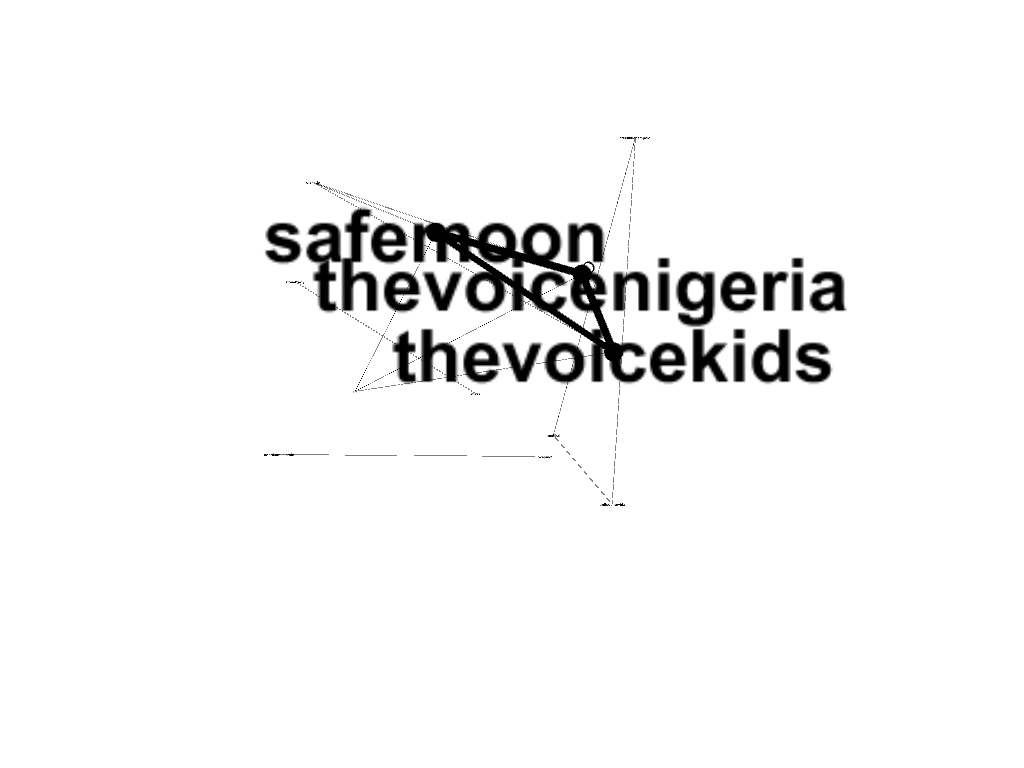

#### Using the betweenness centrality metrics, the most important hash tag is freeakuapempoloo  with 1.0 and unitedshowbiz follows with 1.0. Betweenness centrality measures how a given node lies in shortness of paths between two other nodes which means high communication between the people in the nodes Below is a network visualization depicting the betweenness centrality. The visualization clearly shows freeakuapempoloo as the most important but not the only hash tag with a score of 1.0. It is the most important due its cluster coefficient score of 3.

#### Closeness centrality
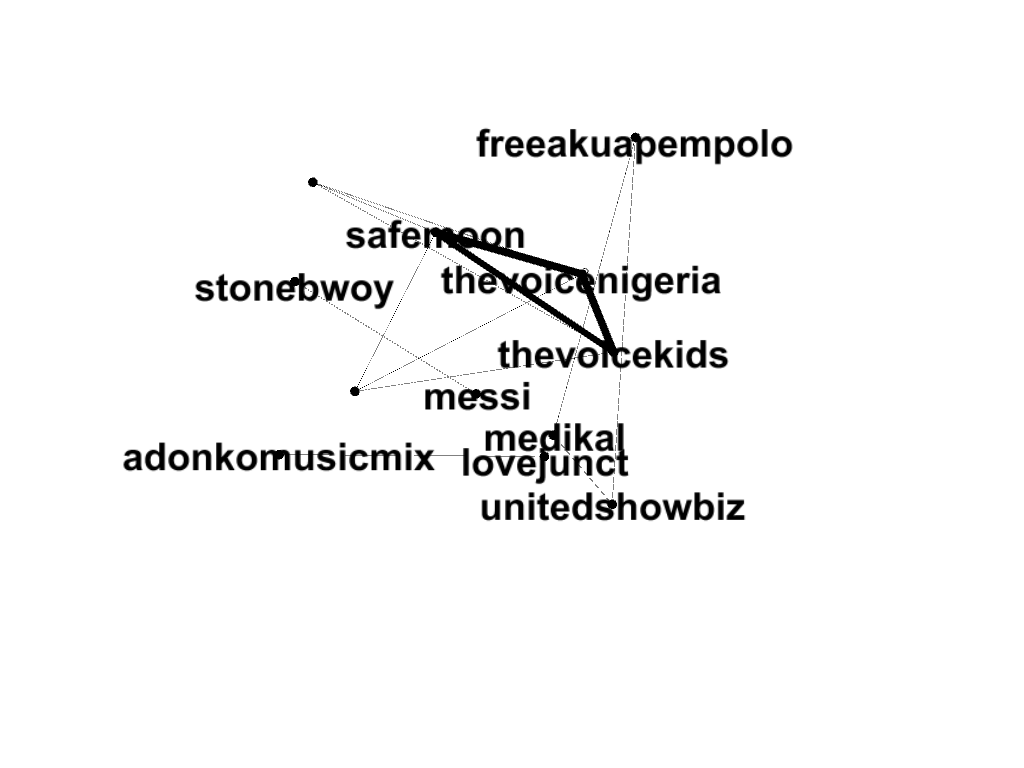

#### Another metrics that is used to determine the most important hash tag in the network is the closeness centrality. Here, we measure the average fairness in terms of distance of a node to all other nodes. Nodes with the shortest distance is considered the one with the highest score. The general idea is how quickly information is spread efficiently through the network. With this metrics, thevoicenigeria stands tall with 1. Above is a network visualization to show that. We can see above that 10 handles have the same score of closeness centrality which means that information spread easily in this network.

#### Eigenvector Centrality
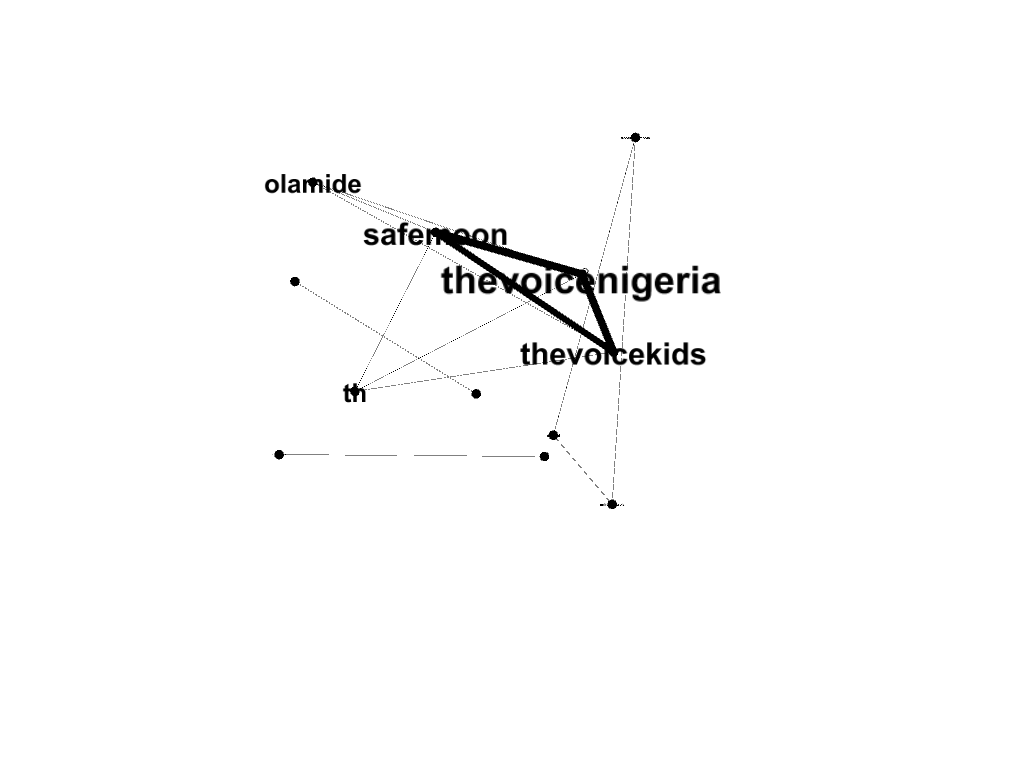

#### Using Eigenvector Centrality metrics to determine who the most important hash tag, thevoicenigeria came out on top with 1.0 and thevoicekids followed with 0.796522. Eigenvector Centrality metrics takes into consideration the connection to the most popular node. The visualization above shows thevoicenigeria as the most important hash tag in term of Eigenvector Centrality.

#### Modularity Centrality
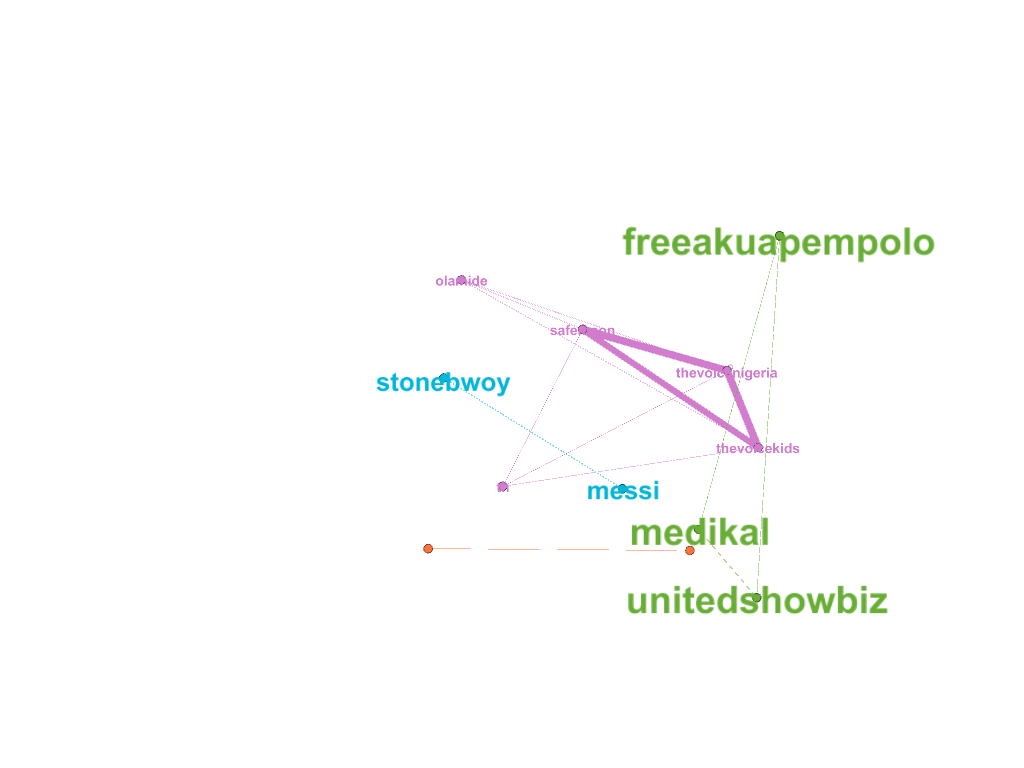

#### There are four (4) clusters. Thus cluster 0, 1, 2, and 3. The two larger group or class is cluster 1 in purple colour and cluster 3 in green. A subgroup or a cluster represents the tight connections between the nodes. Networks are hierarchical which means that some subgroups have more tight connections than others. By order of hierarchy, we have 1, 3, 0 and 2 being the 2 larger ones. The first and largest which is 0 has 41.67%% and the second cluster has 25%.

### Cluster Coefficient
#### The people with the high clustering coefficient scores are people who are directly connected to their respective nodes. In the network, these people tend to have a high degree of cluster formation. Examples of such hash tags with names, freeakuapempoloo, unitedshowbiz,  and other hash tags follows. 

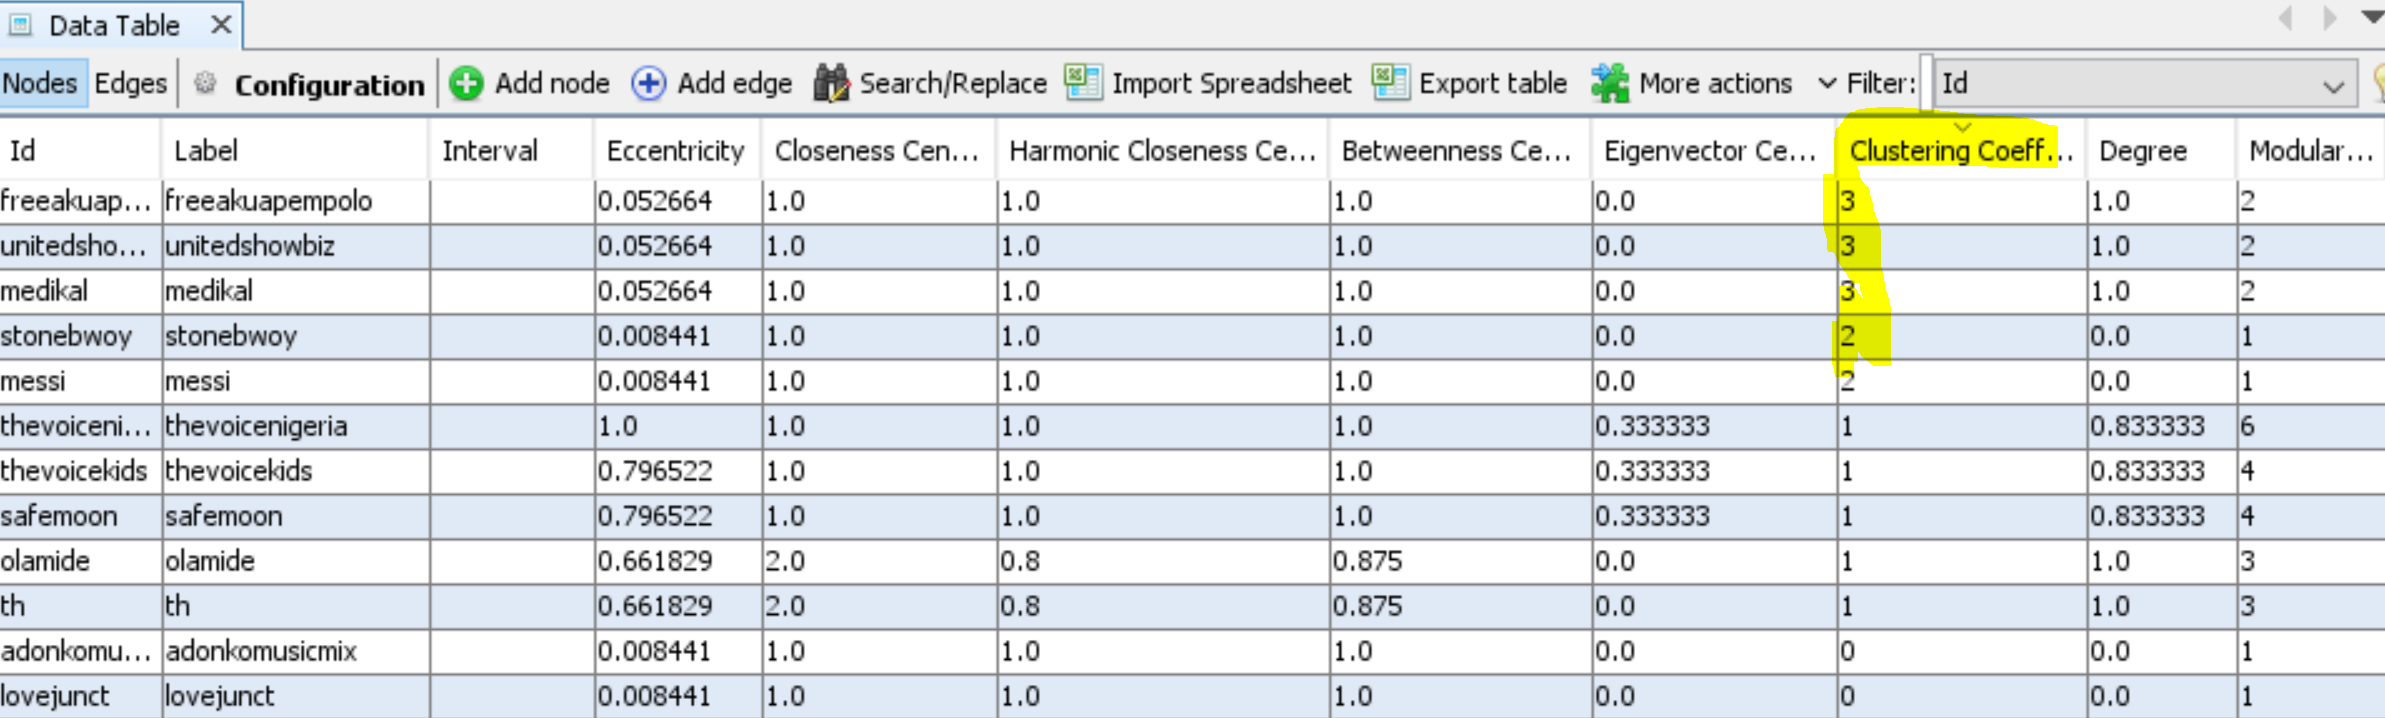

#### The next Network-level metrics characteristics to talk about is the Graph Density. Graph Density shows how dense the connection of nodes are in the network. The concept is measured on a scale from 0 to 1. The closer it is to 1 the higher means very dense graph and the closer it is to 0 means very sparse graph. The graph density for our network is 0.227 which means the graph is very sparse graph

# Storytelling & Conclusion

#### Our analysis takes us on a journey to Ghana where a celebrity has been sentenced to 3 months in prison for taking a nude photo with her son. Our descriptive analysis conducted showed 859 tweets collected for analysis. The first hypothesis was to find out which word or words are the most common in the 859 tweets. Our expectation was see the stage name of the celebrity involved as the most common used word. From our word frequency analysis and wordcloud analysis, the most common words pairing together is akuapem poloo who is the celebrity in trouble. Free akuapem is the next most common words together. Akuffo Addo comes next who happens to be the President of Ghana. Our analysis confirms our expectation or first hypothesis.
#### The second hypothesis is find out how people on twitter feels how the sentencing of the celebrity to 3 months in prison. From the sentiment analysis conducted, we identified 687 positive reviews, 96 negative reviews and 76 neutral reviews. From our negative tweets, we can deduce most of the tweets showed how dissatisfaction at the decision taken by the court to jail the celebrity in question. This means that, most people shared their views negatively on the decision the court has taken in relation to the celebrity. For our positive tweets, the sentiments analysis showed the solidarity and sympathy people showed towards the celebrity and how people called other to sign the petition for her to receive a pardon.
#### Our third hypothesis had the expectation identifying who is the most important person from our twitter feeds and also find out whether the people tweeting are celebrities or are in the entertainment industry. From the network analysis conducted, the metric used such as the Degree of Centrality depicted the handle Change as the most important person. Betweenness Centrality  showed RevErskinGH and the most important handle or person. Eigenvector Centrality identified Change as the most important person. Cluster Coefficient showed ReggieRockStone as the most important. These persons after a research done about them happens to be celebrities in Ghana. 

####  With our sentiment analysis, the people or person to whom the petition is meant for can use this analysis to determine whether to listen to the voice of the people or stick to the sentencing. Our analysis showed many people sympathizing with the celebrity and most negative sentiments geared towards the hash sentencing.  